# Importação de bibliotecas

In [2]:
# @title Importe neste parágrafo as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Dados utilizados

Utilize os dados disponíveis no arquivo [Municípios brasileiros](https://drive.google.com/file/d/1zGLZDhikT0DP9DWewqBdlbhCk-lIA-Ll/view?usp=sharing).

**Descrição dos dados**:

* **CITY**: Nome do município.
* **STATE**: Nome do estado.
* **CAPITAL**: Indicação se o município é capital do seu estado.
* **REGION**: Nome da região brasileira onde o município se encontra.
* **POPULATION_2010**: População estimada daquele município em 2010.
* **POPULATION_2018**: População estimada daquele município em 2018.
* **COMP_TOT**: Número de empresas registradas atuando no município em 2016.
* **LAT**: Latitude do município.
* **LONG**: Longitude do município.
* **ALT**: Altitude do município.
* **AREA**: Área do município em quilômetros quadrados.
* **IDHM**: Índice de Desenvolvimento Humano Municipal em 2010.
* **GDP**: Produto Interno Bruto do município em 2016.
* **GDP_CAPITA**: Produto Interno Bruto per capita do município em 2016.
* **TAXES**: Valor de impostos arrecadados em 2016.
* **MUN_EXPENDT**: Valor declarado de gastos do município.
* **PLATED_AREA**: Área plantada em hectares no município.
* **GVA_AGROPEC**: Valor agregado bruto referente às atividades agropecuárias.
* **RURAL_URBAN**: Tipologia do município atribuída pelo IBGE em 2016.
* **WHELEED_TRACTOR**: Número de tratores registrados no município em 2019.

# Pré-processamento dos dados dos municípios brasileiros

Os dados do arquivo deverão ser pré-processados antes das visualizações.

Utilize o trecho de código abaixo para esta tarefa de pré-processamento.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/BRAZIL_CITIES.csv';

df_brasil = pd.read_csv(file_path, sep= ';', decimal=",");

columns = ['CITY','STATE','CAPITAL','IBGE_RES_POP','AREA', 'RURAL_URBAN','IDHM','LONG','LAT','ALT', 'ESTIMATED_POP','GDP','TAXES','GDP_CAPITA', 'COMP_TOT','MUN_EXPENDIT','GVA_AGROPEC', 'Wheeled_tractor','IBGE_PLANTED_AREA']

df_brasil = df_brasil[columns];

df_brasil.CAPITAL = df_brasil.CAPITAL.replace(0, 'NÃO');

df_brasil.CAPITAL = df_brasil.CAPITAL.replace(1, 'SIM')

df_brasil.MUN_EXPENDIT = df_brasil.MUN_EXPENDIT.replace(np.nan, 0)

df_brasil.dropna(how ='any', inplace = True)

df_brasil.rename(columns={'IBGE_RES_POP': 'POPULATION_2010', 'ESTIMATED_POP': 'POPULATION_2018', 'Wheeled_tractor': 'WHEELED_TRACTOR', 'IBGE_PLANTED_AREA': 'PLANTED_AREA'}, inplace=True)

df_brasil['AREA'] = df_brasil['AREA'].apply(lambda n: float(n.replace(',', '')))

df_brasil['IDHM'] = df_brasil['IDHM'].astype(float)

df_brasil['GDP'] = df_brasil['GDP'].astype(float)

df_brasil['GDP_CAPITA'] = df_brasil['GDP_CAPITA'].astype(float)

df_brasil['TAXES'] = df_brasil['TAXES'].astype(float)

df_brasil['LONG'] = df_brasil['LONG'].astype(float)

df_brasil['LAT'] = df_brasil['LAT'].astype(float)

df_brasil['LAT'] = df_brasil['LAT'].astype(float)

df_brasil['PLANTED_AREA'] = df_brasil['PLANTED_AREA'].astype(float)

df_brasil['GVA_AGROPEC'] = df_brasil['GVA_AGROPEC'].astype(float)

NORTE = ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO']

NORDESTE = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']

CENTROOESTE = ['DF', 'GO', 'MT', 'MS']

SUDESTE = ['ES', 'MG', 'SP', 'RJ']

SUL = ['PR', 'SC', 'RS']

def conversion_reg(n):
  if n in NORTE:
    return 'NORTE'
  elif n in NORDESTE:
    return 'NORDESTE'
  elif n in CENTROOESTE:
    return 'CENTROOESTE'
  elif n in SUDESTE:
    return 'SUDESTE'
  elif n in SUL:
    return 'SUL'
  else:
    return 'ERROR'

df_brasil['REGION'] = df_brasil['STATE'].apply(conversion_reg)

Mounted at /content/drive


# Gráficos de Barras ou Colunas

## Análise Univariada

Crie gráfico com barras verticais para comparar o produto interno bruto per capita dos estados brasileiros e do distrito federal para o ano de 2016.

O gráfico deverá apresentar a seguinte visualização:

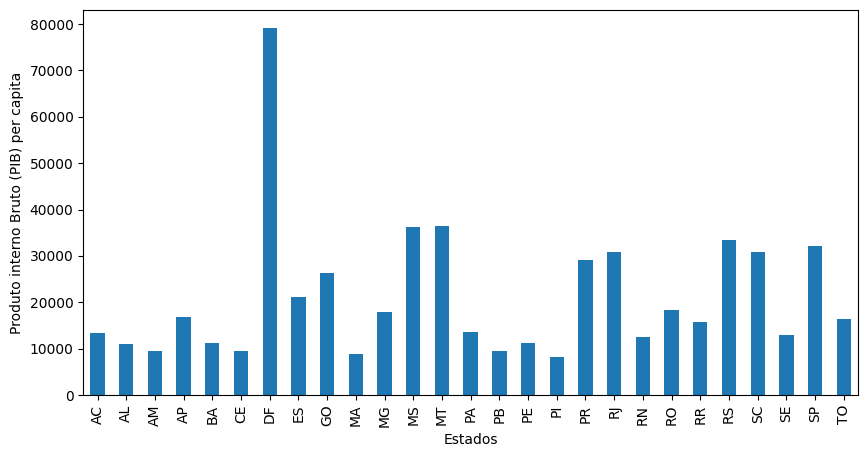

Por meio do gráfico apresentado na Figura, é possível comparar o valor do PIB dos estados e do distrito federal de maneira mais clara do que utilizando uma tabela com o valor de cada PIB. O gráfico mostra, por exemplo, que o Distrito Federal tem o maior PIB per capita, que os maiores valores estão concentrados nos estados que compõem as Regiões Sul, Sudeste e Centro-Oeste do país. Uma possível interpretação do gráfico, considerando também uma outra variável como a quantidade total de pessoas que vivem em cada estado, é que os estados do Sudeste e Sul apresentam valores, em proporção, altos e similares, e que o Distrito Federal abarca muitas pessoas com alta concentração de renda.

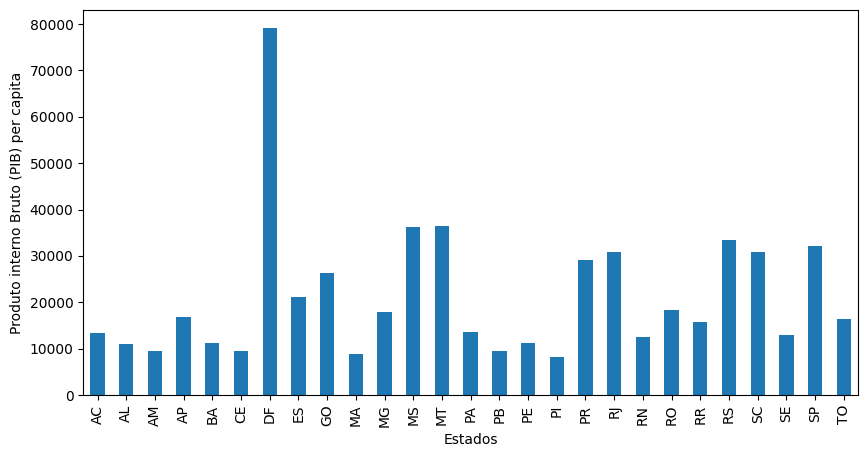

In [4]:
# @title Construa o seu código aqui

pib_estados = df_brasil.groupby(["STATE"])["GDP_CAPITA"].mean()
pib_estados.plot.bar(figsize=(10, 5))
plt.xlabel("Estados", fontsize=10)
plt.ylabel("Produto interno Bruto (PIB) per capita", fontsize=10)
plt.xticks(rotation=90)
plt.show()

## Análise Multivariada

Crie um gráfico que mostre a porcentagem de cidades e pessoas por região do Brasil.

O gráfico deverá apresentar a seguinte visualização:

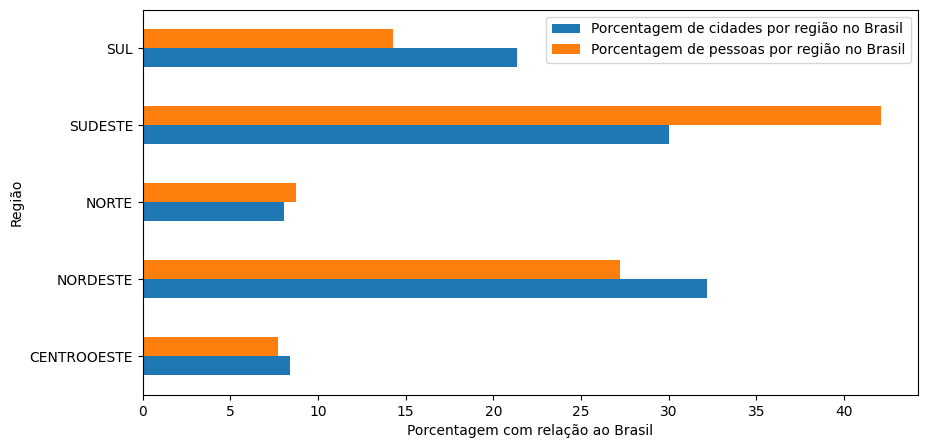

Por meio do gráfico apresentado na Figura, é possível observar quais regiões apresentam uma relação mais semelhante entre a porcentagem de município e a porcentagem de habitantes. Enquanto as Regiões Centro-Oeste e Norte apresentam proporções similares, a Região Sudeste concentra mais de 40% da população e menos de 30% dos municípios do país. Mostra ainda que, provavelmente, as cidades do Sudeste são as mais populosas e as do Nordeste e do Sul as menos populosas do país.

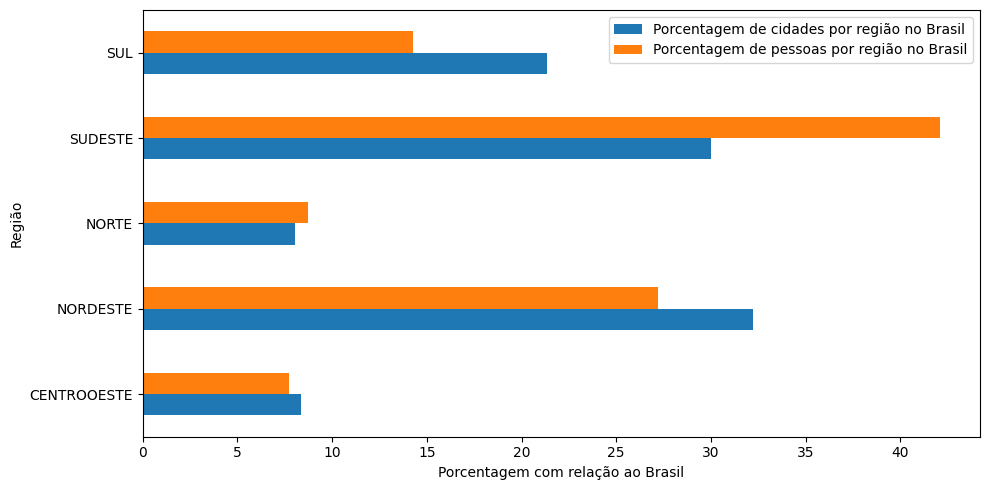

In [5]:
# @title Construa o seu código aqui

cidades_por_regiao = df_brasil.groupby("REGION").size()
total_cidades = df_brasil.shape[0]
percentual_cidades = (cidades_por_regiao / total_cidades) * 100

populacao_por_regiao = df_brasil.groupby("REGION")["POPULATION_2018"].sum()
total_populacao = df_brasil["POPULATION_2018"].sum()
percentual_populacao = (populacao_por_regiao / total_populacao) * 100

dados_grafico = pd.DataFrame({
    "Porcentagem de cidades por região no Brasil": percentual_cidades,
    "Porcentagem de pessoas por região no Brasil": percentual_populacao
})

ax = dados_grafico.plot.barh(figsize=(10, 5))
plt.xlabel("Porcentagem com relação ao Brasil", fontsize=10)
plt.ylabel("Região", fontsize=10)

plt.tight_layout()
plt.show()

# Gráfico de Setor

O gráfico deverá apresentar a seguinte visualização:

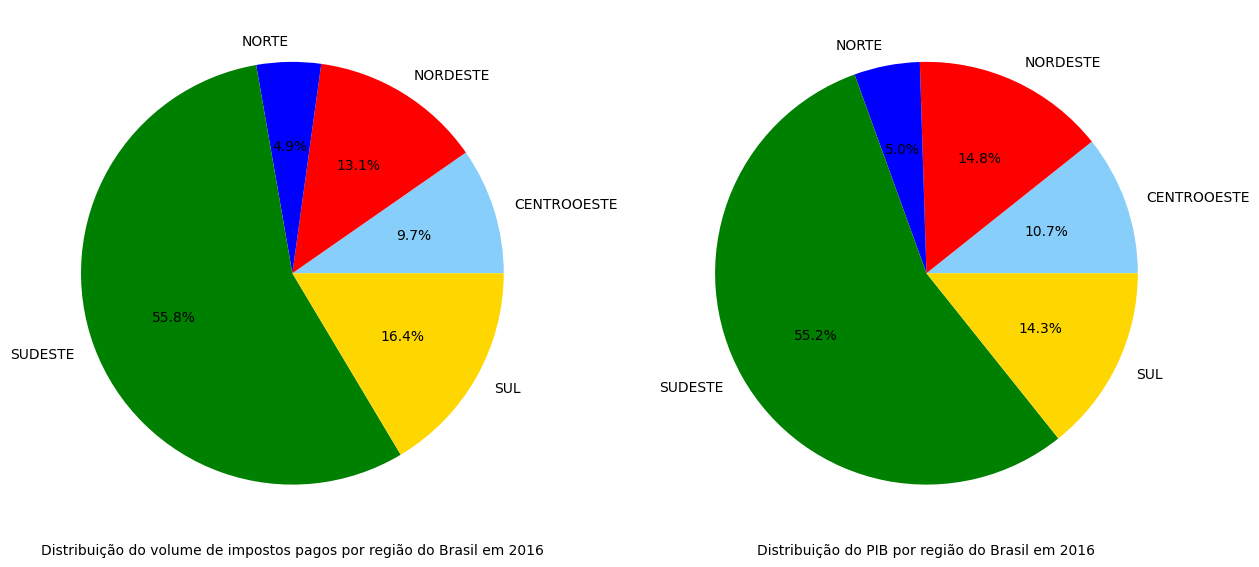

A Figura mostra seu uso em dois gráficos cuja distribuição das fatias espera-se que sejam semelhantes: a distribuição do volume de impostos pagos por região no Brasil e a distribuição do PIB nessas regiões.

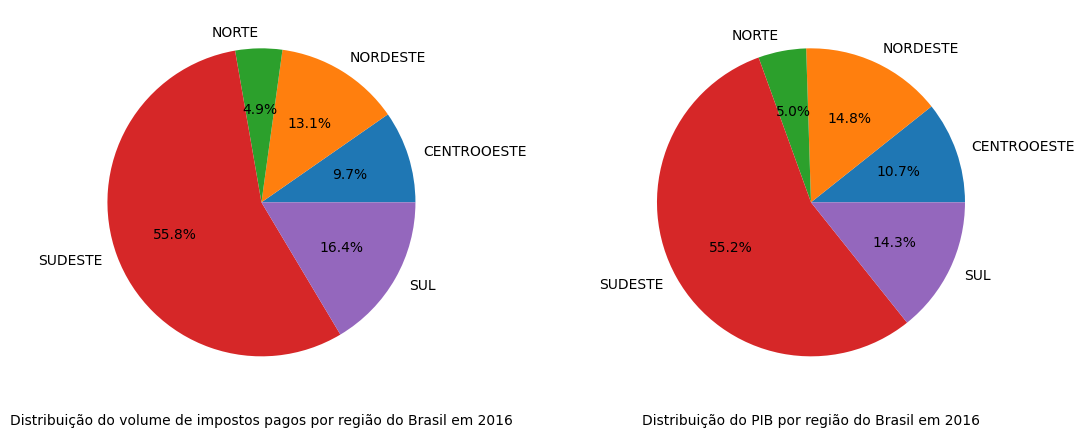

In [6]:
# @title Construa o seu código aqui

impostos_por_regiao = df_brasil.groupby("REGION")["TAXES"].sum()
pib_por_regiao = df_brasil.groupby("REGION")["GDP"].sum()

fig, ax = plt.subplots(1, 2, figsize=(13, 5))

ax[0].pie(impostos_por_regiao, labels=impostos_por_regiao.index, autopct="%1.1f%%")
ax[0].set_title("Distribuição do volume de impostos pagos por região do Brasil em 2016", y=-0.1, fontsize=10)

ax[1].pie(pib_por_regiao, labels=pib_por_regiao.index, autopct="%1.1f%%")
ax[1].set_title("Distribuição do PIB por região do Brasil em 2016", y=-0.1, fontsize=10)

plt.show()

# Gráficos de Dispersão

* Os gráficos de dispersão, em inglês, *scatter plot*, são utilizados para mostrar como duas variáveis se relacionam.

* Representa a relação dos valores de pares de atributos de variáveis quantitativas.

## Análise Bivariada

* Descrever a relação entre o índice de desenvolvimento humano municipal (IDHM) de cada município e o valor das despesas declaradas pelo município para o ano de 2016. Para representar uma terceira variável, a região do município, associaremos uma cor para cada região.

O gráfico deverá apresentar a seguinte visualização:

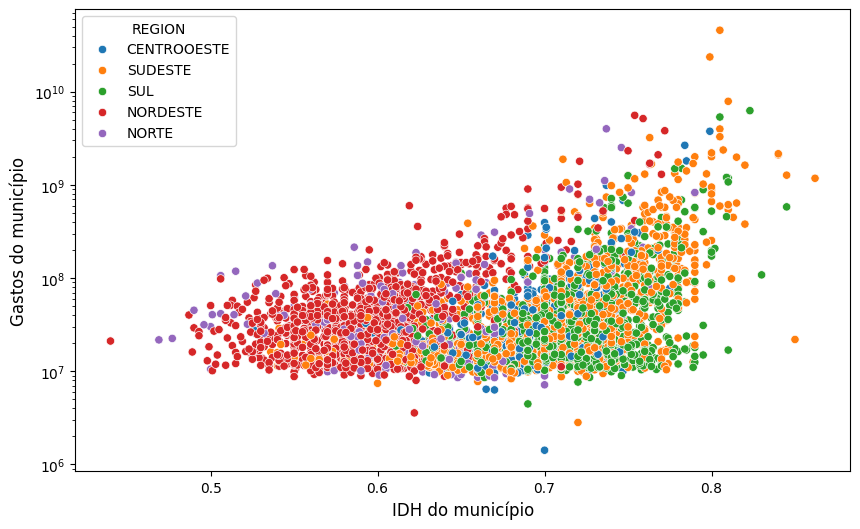

Esse gráfico mostra que, colocando em proporção, para gastos de até 100 milhões de reais, a maioria dos municípios nordestinos apresenta valores de IDH entre 0,5 e 0,65.

Para a mesma média de gastos, os municípios do Sudeste e Sul apresentam melhores indicadores de IDH, cujos valores variam entre 0,65 e 0,8.

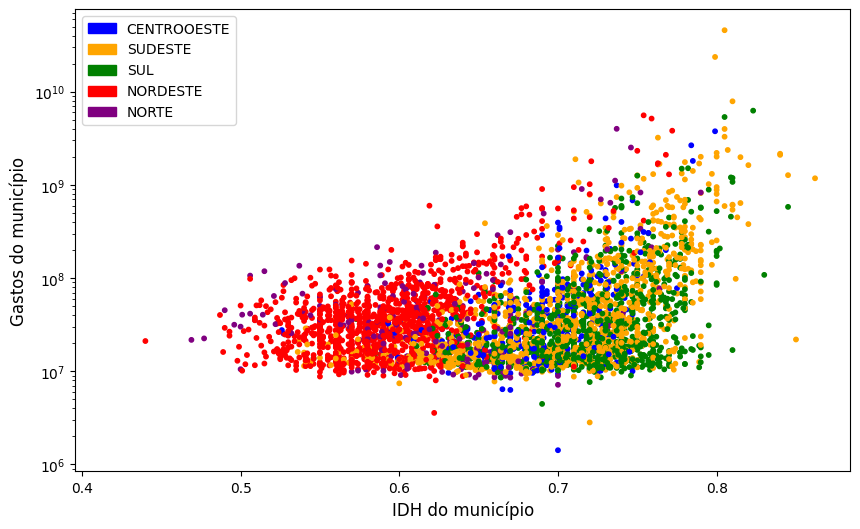

In [7]:
# @title Construa o seu código aqui

color_map = {
    "CENTROOESTE": "blue",
    "SUDESTE": "orange",
    "SUL": "green",
    "NORDESTE": "red",
    "NORTE": "purple"
}

plt.figure(figsize=(10,6))
plt.scatter(
    df_brasil["IDHM"],
    df_brasil["MUN_EXPENDIT"],
    c=df_brasil["REGION"].map(color_map),
    s=10
)
plt.yscale("log")
plt.xlabel("IDH do município", fontsize=12)
plt.ylabel("Gastos do município", fontsize=12)
legend_patches = [mpatches.Patch(color=color, label=region)
for region, color in color_map.items()]
plt.legend(handles=legend_patches)
plt.show()


Para melhor identificar a situação de cada município, podemos traçar o gráfico em função da sua latitude e longitude. Neste caso, como mostrado na Figura, a cor e o tamanho de cada ponto representarão o IDH e as despesas de cada município.

O gráfico deverá apresentar a seguinte visualização:

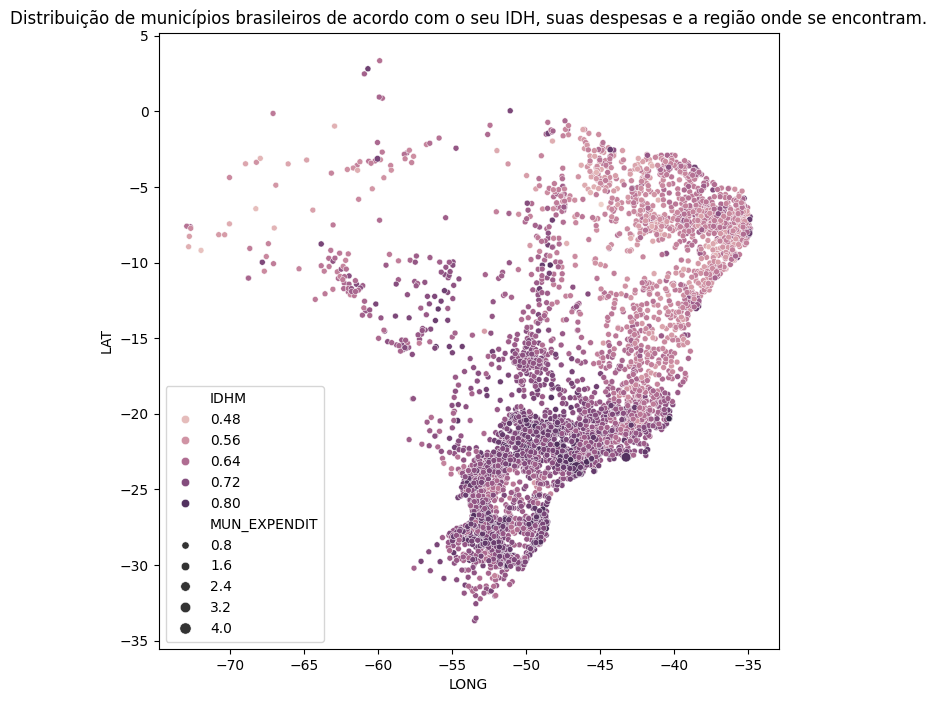

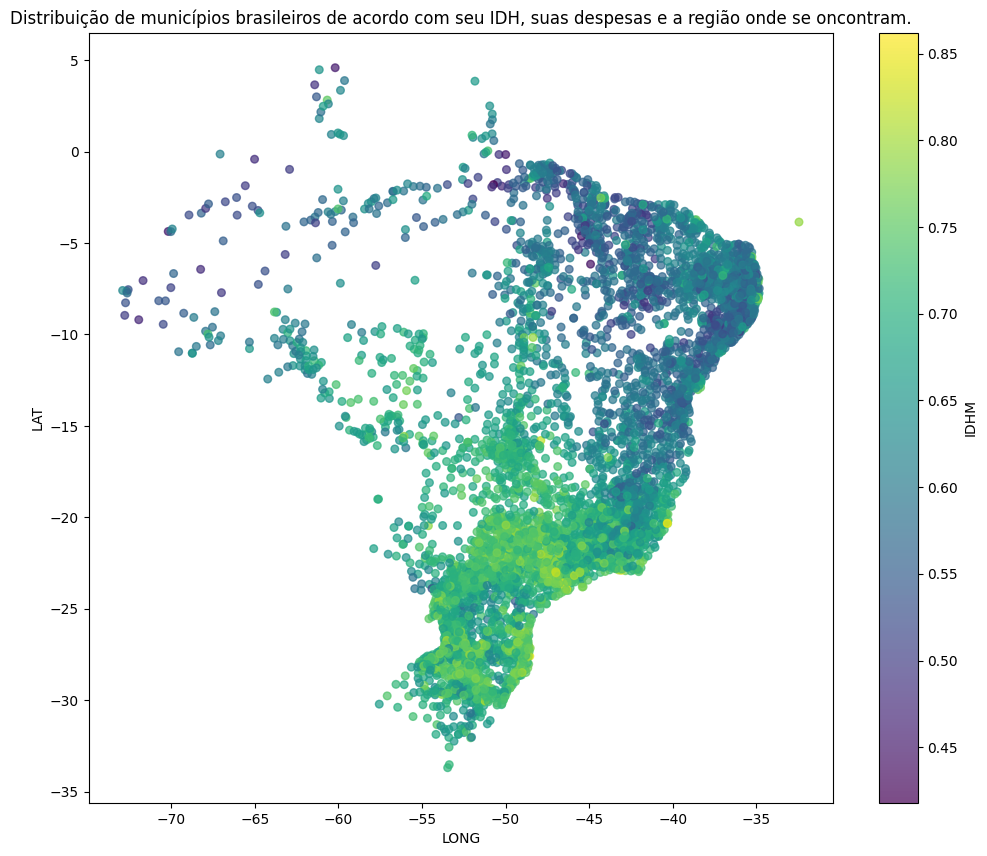

In [8]:
# @title Construa o seu código aqui

plt.figure(figsize=(12,10))
plt.scatter(df_brasil["LONG"], df_brasil["LAT"],
            c=df_brasil["IDHM"], cmap="viridis", alpha=0.7, s=30)
plt.xlabel("LONG")
plt.ylabel("LAT")
plt.title("Distribuição de municípios brasileiros de acordo com seu IDH, suas despesas e a região onde se oncontram.")
plt.colorbar(label="IDHM")
plt.show()

## Análise Multivariada

* Uma forma de utilizar gráficos de dispersão para uma análise multivariada é gerar uma matriz de gráficos de dispersão para cada par de atributos, em que cada gráfico da matriz descreve a relação entre um par de atributos.

O gráfico deverá apresentar a seguinte visualização:

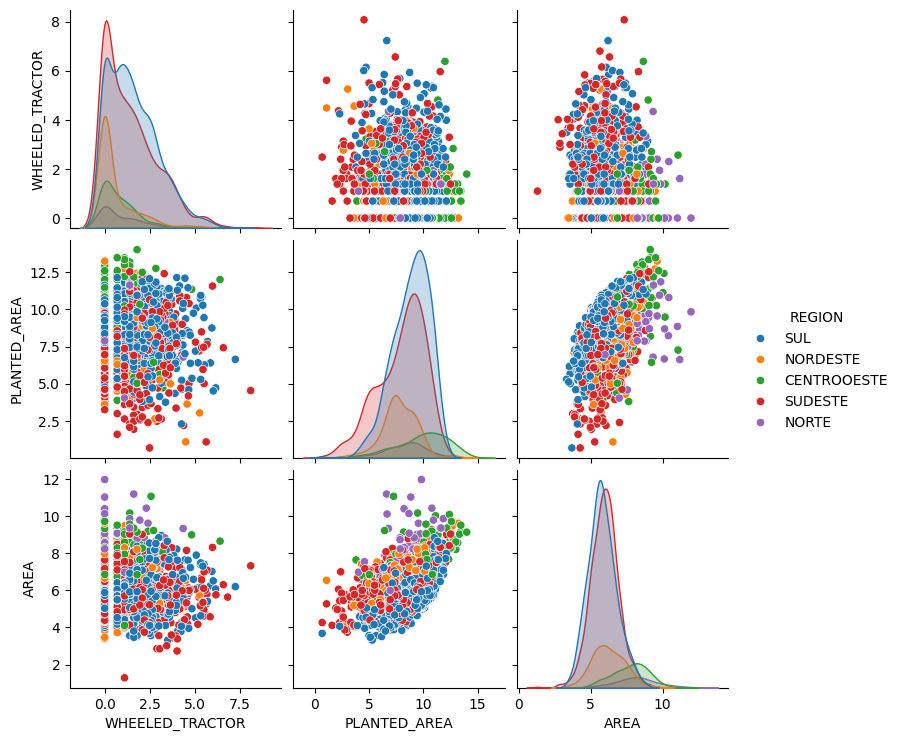

Na matriz de gráficos de dispersão, a diagonal principal representa a distribuição marginal de cada variável individualmente, enquanto os outros gráficos indicam a relação entre os diversos pares de atributos. Por meio de uma análise rápida da matriz de gráficos, é possível ver que existe uma correlação positiva entre a área e a área plantada. Contudo, como mostrado também no gráfico, não é porque a área plantada é maior que o número de tratores registrados na cidade também será.

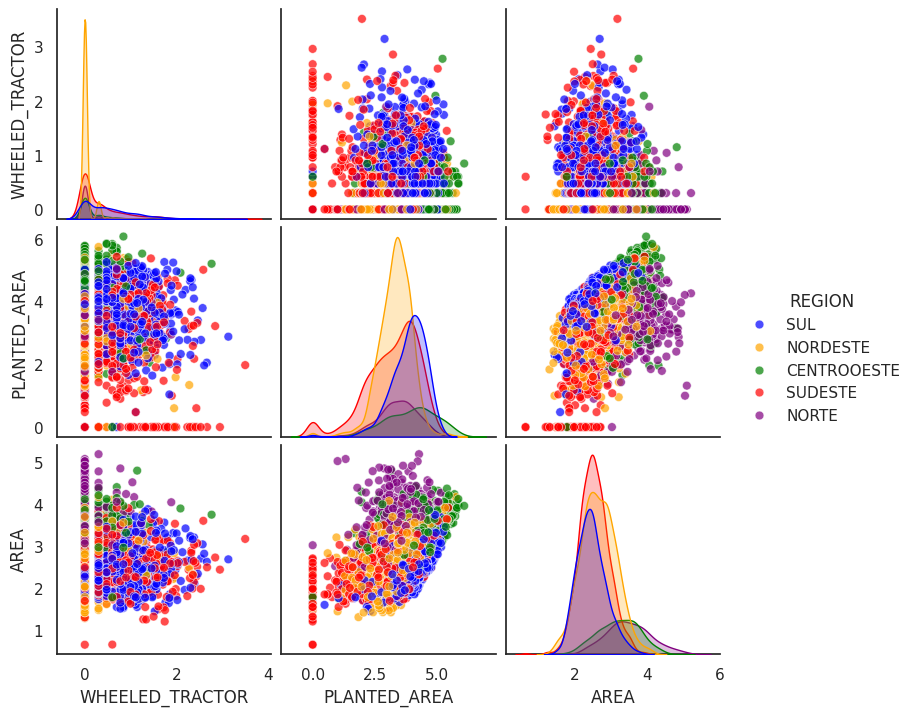

In [9]:
# @title Construa o seu código aqui

log_cols = ["WHEELED_TRACTOR", "PLANTED_AREA", "AREA"]

for col in log_cols:
    df_brasil[f"{col}_LOG"] = np.log10(df_brasil[col] + 1)

region_order = ["SUL", "NORDESTE", "CENTROOESTE", "SUDESTE", "NORTE"]
region_palette = {
    "SUL": "blue",
    "NORDESTE": "orange",
    "CENTROOESTE": "green",
    "SUDESTE": "red",
    "NORTE": "purple"
}

sns.set_theme(style="white", context="notebook")

g = sns.pairplot(
    df_brasil,
    vars=[f"{c}_LOG" for c in log_cols],
    hue="REGION",
    hue_order=region_order,
    palette=region_palette,
    diag_kind="kde",
    plot_kws={"s": 40, "alpha": 0.7}
)

plt.subplots_adjust(top=0.95)

for ax in g.axes.flatten():
    if ax:
        ax.set_xlabel(ax.get_xlabel().replace("_LOG", ""))
        ax.set_ylabel(ax.get_ylabel().replace("_LOG", ""))

plt.show()

# Gráficos de Linhas

* O gráfico de linhas é a versão “contínua” do gráfico de dispersão, no qual as variações dos valores de dois atributos podem ser vistas de maneira mais clara por meio da linha formada entre os valores nos eixos horizontal e vertical.

O gráfico deverá apresentar a seguinte visualização:

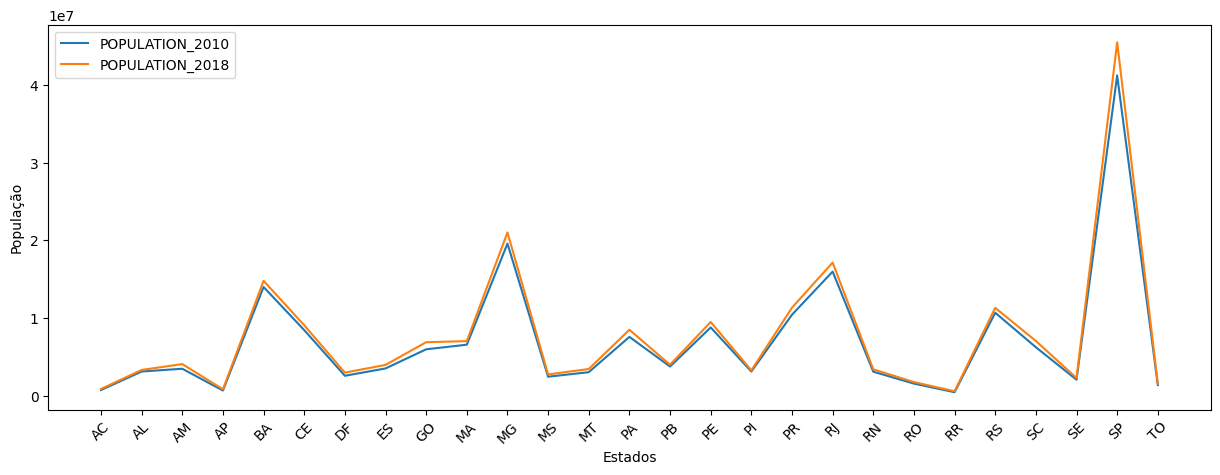

Considerando as variações populacionais para cada estado, é possível observar que, em todos os estados, o aumento da população foi pequeno. Nota-se também, ao comparar a variação da população nos estados entre 2010 e 2018, que a população do estado do Acre permaneceu praticamente a mesma, enquanto a do estado de São Paulo apresentou o maior aumento da população.

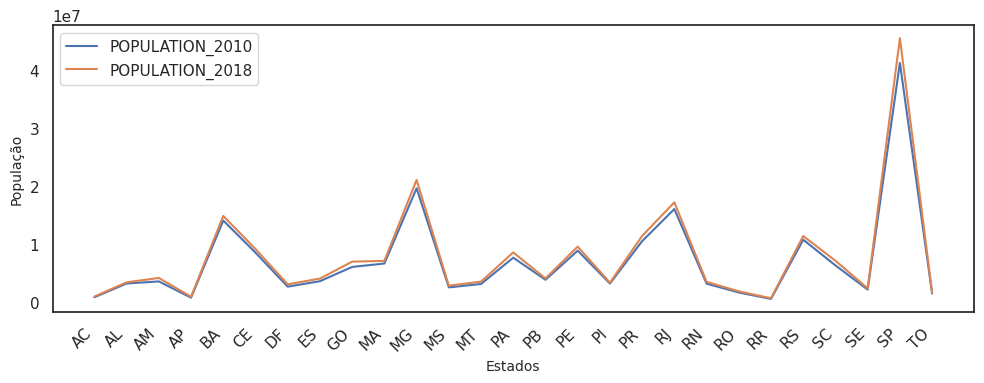

In [10]:
# @title Construa o seu código aqui

populacao_por_estado = df_brasil.groupby("STATE")[["POPULATION_2010", "POPULATION_2018"]].sum()
populacao_por_estado.columns = ["POPULATION_2010", "POPULATION_2018"]

populacao_por_estado.plot(kind="line", figsize=(10, 4))
plt.xlabel("Estados", fontsize=10)
plt.ylabel("População", fontsize=10)
plt.xticks(
    ticks=range(len(populacao_por_estado.index)),
    labels=populacao_por_estado.index,
    rotation=45,
    ha="right"
)
plt.tight_layout()
plt.show()

# Gráficos de Radar

* Os gráficos de radar, em inglês, radar chart, talvez sejam os gráficos conhecidos por mais nomes diferentes, como gráficos de aranha, por ter um formato similar ao de uma teia de aranha (spider chart), gráficos de estrela (star chart), por ter o formato parecido com o de uma estrela ou gráficos polares (polar chart), quando representa variáveis por coordenadas polares.

Para ilustrar este tipo de visualização, utilizaremos a quantidade de cidades, área, população, impostos pagos e PIB agrupados por cada região brasileira. Com isso, analisaremos a relação dos valores desses 6 atributos para 5 objetos (as regiões do país).

O gráfico deverá apresentar a seguinte visualização:

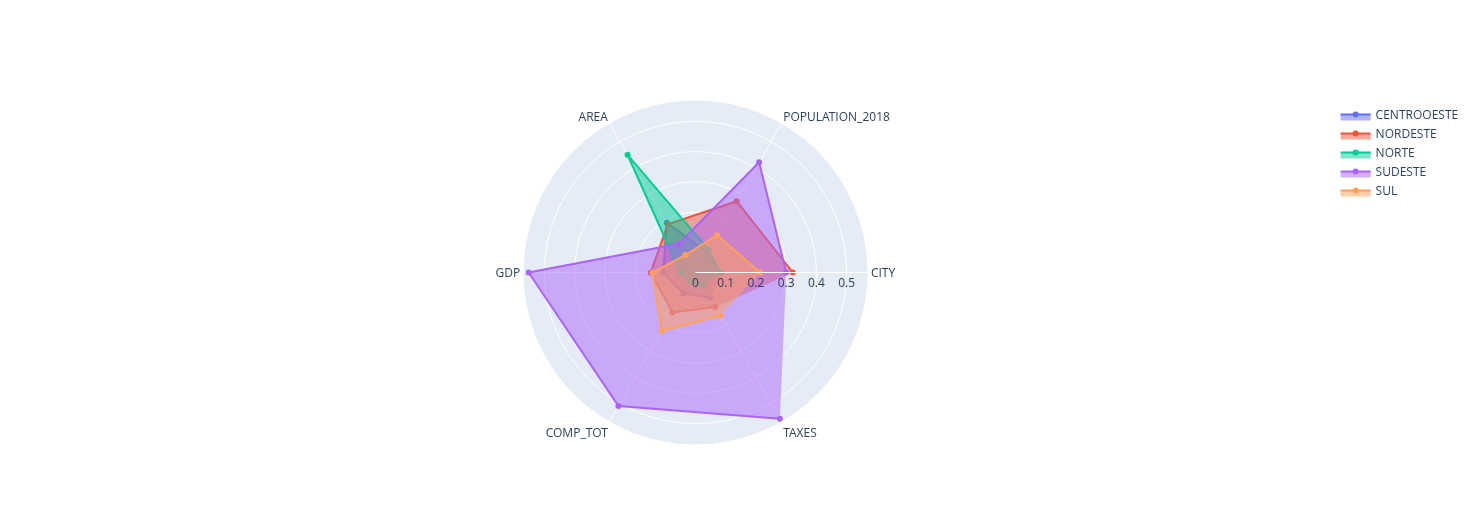

A utilização de gráficos de radar permite identificar a relação de múltiplos atributos para vários objetos, por exemplo, avaliar que, em 2016, a Região Sudeste foi responsável por mais de 50% do PIB nacional e impostos arrecadados, além de possuir mais de 50% de empresas registradas no país. Enquanto isso, a Região Sul possuía 27% dos municípios brasileiros e participava com 14% do PIB nacional. É importante lembrar que a identificação individual das proporções é prejudicada à medida que mais objetos são adicionados ao gráfico.

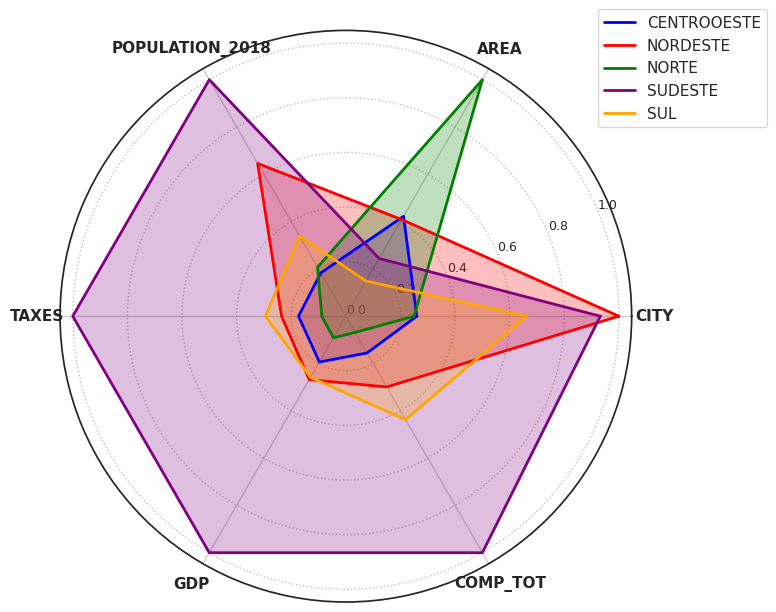

In [11]:
# @title Construa o seu código aqui

df_region = df_brasil.groupby("REGION").agg({
    "CITY": "count",
    "AREA": "sum",
    "POPULATION_2018": "sum",
    "TAXES": "sum",
    "GDP": "sum",
    "COMP_TOT": "sum"
})

df_norm = df_region / df_region.max()

categorias = df_norm.columns.tolist()
N = len(categorias)
angulos = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angulos += angulos[:1]

region_order = ["CENTROOESTE", "NORDESTE", "NORTE", "SUDESTE", "SUL"]
region_palette = {
    "CENTROOESTE": "blue",
    "NORDESTE": "red",
    "NORTE": "green",
    "SUDESTE": "purple",
    "SUL": "orange"
}

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for regiao in region_order:
    valores = df_norm.loc[regiao].tolist()
    valores += valores[:1]
    ax.plot(angulos, valores, linewidth=2, label=regiao, color=region_palette[regiao])
    ax.fill(angulos, valores, alpha=0.25, color=region_palette[regiao])

ax.set_xticks(angulos[:-1])
ax.set_xticklabels(categorias, fontsize=11, weight="semibold")
ax.set_yticks(np.linspace(0, 1, 6))
ax.set_yticklabels([f"{x:.1f}" for x in np.linspace(0, 1, 6)], fontsize=9)
ax.yaxis.grid(True, color="gray", linestyle="dotted", alpha=0.5)

plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1.05))
plt.tight_layout()
plt.show()

# Gráficos de Coordenadas Paralelas

* Os gráficos de coordenadas paralelas também permitem a representação visual de múltiplas variáveis.
* Nesses gráficos, cada atributo é retratado por um eixo vertical. Assim, se o conjunto de dados tem m atributos, o gráfico terá m eixos.

O gráfico deverá apresentar a seguinte visualização:

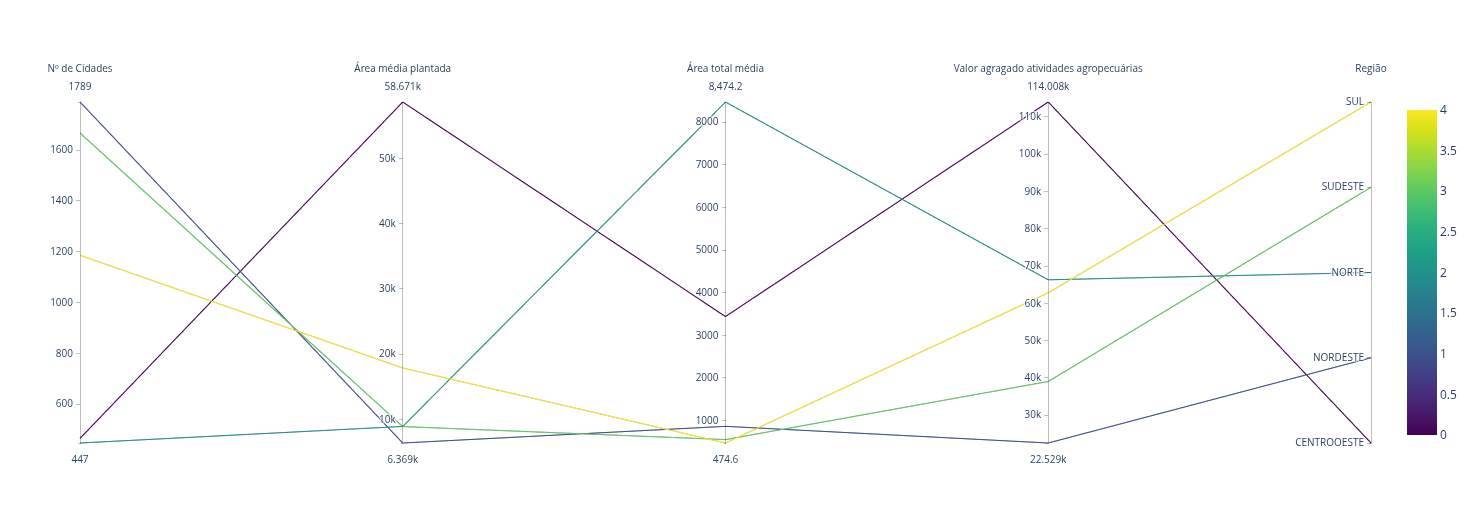

In [15]:
# @title Construa o seu código aqui

df_agg = (
    df_brasil
    .groupby("REGION")
    .agg(
        Num_Cidades=("CITY", "count"),
        Area_Media_Plantada=("PLANTED_AREA", "mean"),
        Area_Total_Media=("AREA", "mean"),
        Valor_Agregado_Agropecuario=("GVA_AGROPEC", "mean")
    )
    .reset_index()
)

reg_map = {
    "CENTROOESTE": 0,
    "NORDESTE": 1,
    "NORTE": 2,
    "SUDESTE": 3,
    "SUL": 4
}
df_agg["Regiao_Num"] = df_agg["REGION"].map(reg_map)

fig = px.parallel_coordinates(
    df_agg,
    color="Regiao_Num",
    dimensions=[
        "Num_Cidades",
        "Area_Media_Plantada",
        "Area_Total_Media",
        "Valor_Agregado_Agropecuario",
        "Regiao_Num"
    ],
    labels={
        "Num_Cidades": "Nº de Cidades",
        "Area_Media_Plantada": "Área Média Plantada (ha)",
        "Area_Total_Media": "Área Total Média (ha)",
        "Valor_Agregado_Agropecuario": "Valor Agregado Agropecuário",
        "Regiao_Num": "Região"
    },
    color_continuous_scale=px.colors.sequential.Viridis,
    range_color=[0, 4]
)

fig.update_traces(
    dimensions=[
        {
            "label": "Nº de Cidades",
            "values": fig.data[0]["dimensions"][0]["values"]
        },
        {
            "label": "Área média plantada",
            "values": fig.data[0]["dimensions"][1]["values"]
        },
        {
            "label": "Área total média",
            "values": fig.data[0]["dimensions"][2]["values"]
        },
        {
            "label": "Valor agregado atividades agropecuárias",
            "values": fig.data[0]["dimensions"][3]["values"]
        },
        {
            "label": "Região",
            "values": fig.data[0]["dimensions"][4]["values"],
            "tickvals": [0, 1, 2, 3, 4],
            "ticktext": ['CENTROOESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL']
        }
    ]
)

fig.update_layout(
    width=1700,
    height=600,
    font=dict(size=14),
    title_x=0.5,
    title_font=dict(size=20, family="Arial", color="black")
)

fig.show()


# Histogramas

*  gráficos utilizados para representar dados agrupados por intervalos de valores, de mesmo tamanho, ou por um valor nominal, para uma mesma variável, denominados bins.
* comumente aplicado para representação da distribuição de frequências de uma variável de interesse.

Visualizaremos a distribuição de PIB per capita dos municípios brasileiros mais ricos, agrupados por estado

O gráfico deverá apresentar a seguinte visualização:

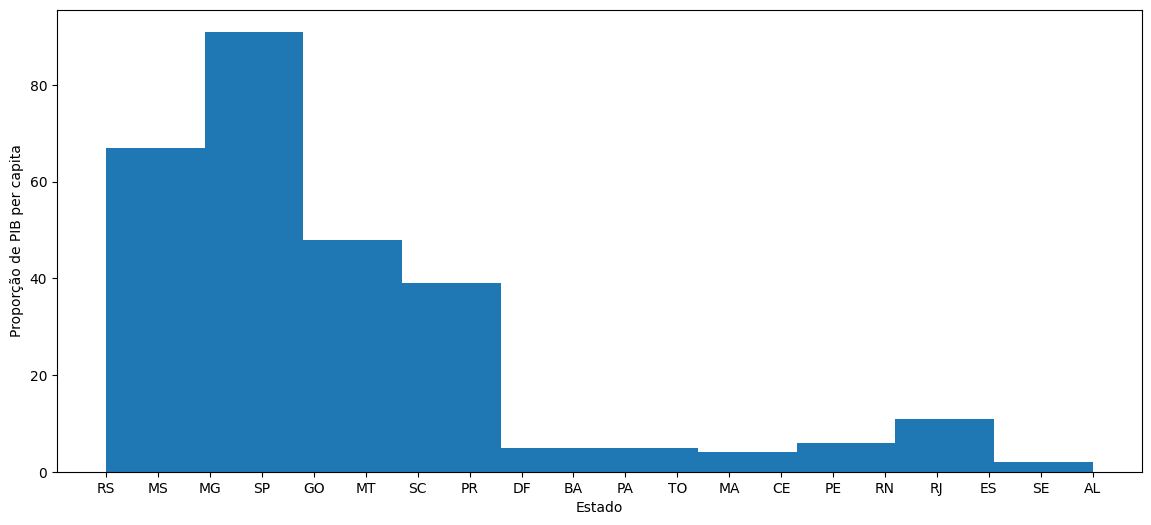

Utilizando um filtro para obter a frequência dos estados que possuem os municípios com valores de PIB per capita maiores que 95% da maioria, é possível verificar, por meio da Figura, que os estados com maior valor de PIB per capita são Minas Gerais e São Paulo.
Nota-se também o quão diferente são o PIB per capita dos estados da Região Centro-Oeste com relação aos estados do Nordeste.

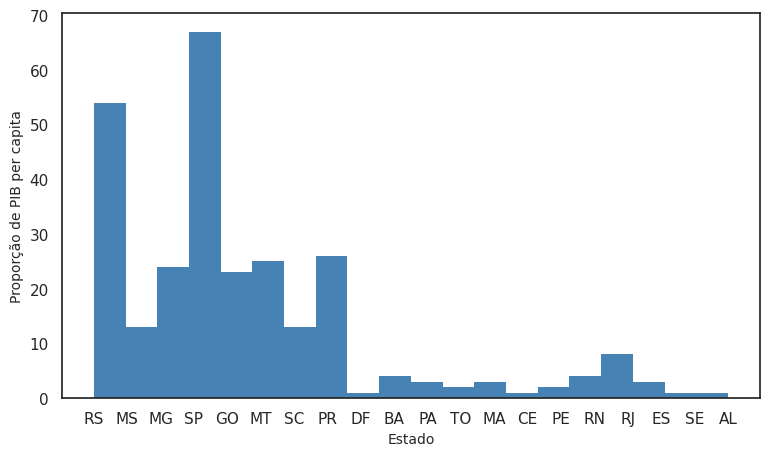

In [16]:
# @title Construa o seu código aqui

limite = df_brasil["GDP_CAPITA"].quantile(0.95)
pib_alto = df_brasil[df_brasil["GDP_CAPITA"] > limite]

plt.figure(figsize=(9,5))
plt.hist(pib_alto["STATE"],
         bins=len(pib_alto["STATE"].unique()),
         color="steelblue",
         edgecolor="none")
plt.xlabel("Estado", fontsize=10)
plt.ylabel("Proporção de PIB per capita", fontsize=10)
plt.show()

# Gráfico de Caixa – *Boxplot*

* O gráfico ou diagrama de caixa, em inglês, boxplot, também chamado de whisker plot ou diagrama de caixa, sumariza a distribuição de valores de uma variável ou atributo por meio de uma caixa e 5 valores.



* Primeiro passo é ordenar os valores da variável em ordem crescente e selecionar 3 valores, quartis, que dividem o conjunto ordenado de valores em 4 partes com o mesmo número de valores
* A amplitude interquatílica, também chamada de **distância entre quartis**, indica a diferença entre o terceiro e o primeiro quartil. Ela representa a altura da “caixa” onde estão concentrados 50% de todos os valores da amostra.
* Os valores máximo e mínimo de um gráfico de caixa determinam se um valor é discrepante (***outlier***) com relação aos demais.
 * Os valores máximo e mínimo são calculados, respectivamente, pelas equações Q3 + 1,5 × (Q3 − Q1) e Q1 − 1,5 × (Q3 − Q1).

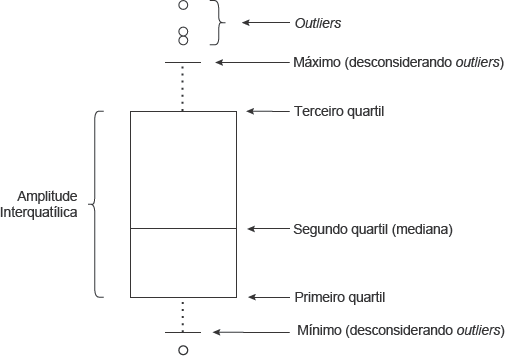

O gráfico deverá apresentar a seguinte visualização:

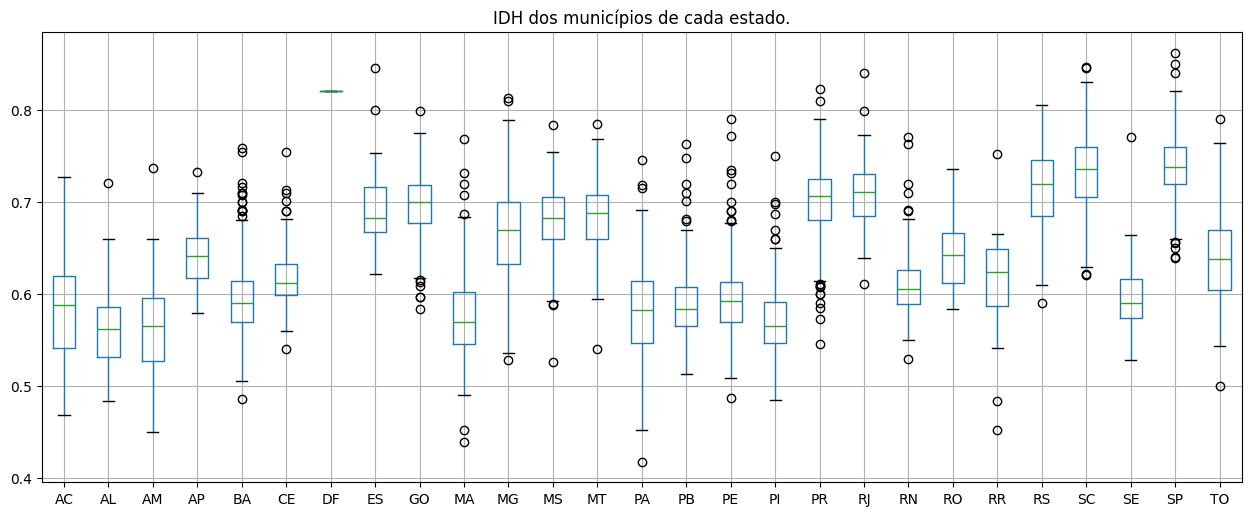


A Figura apresenta um gráfico de caixa para ilustrar graficamente a distribuição do **IDH dos municípios** em cada estado brasileiro no ano de 2010.
A Figura permite várias comparações diretas das distribuições dos valores de IDH dos estados:
* Nenhum estado das Regiões Norte e Nordeste apresentou uma mediana dos valores de IDH acima de 0,7.
* Os estados com municípios que apresentam IDH mais discrepante com relação a sua maioria, ou seja, com mais outliers, tanto positiva quanto negativamente, foram Paraná e São Paulo.

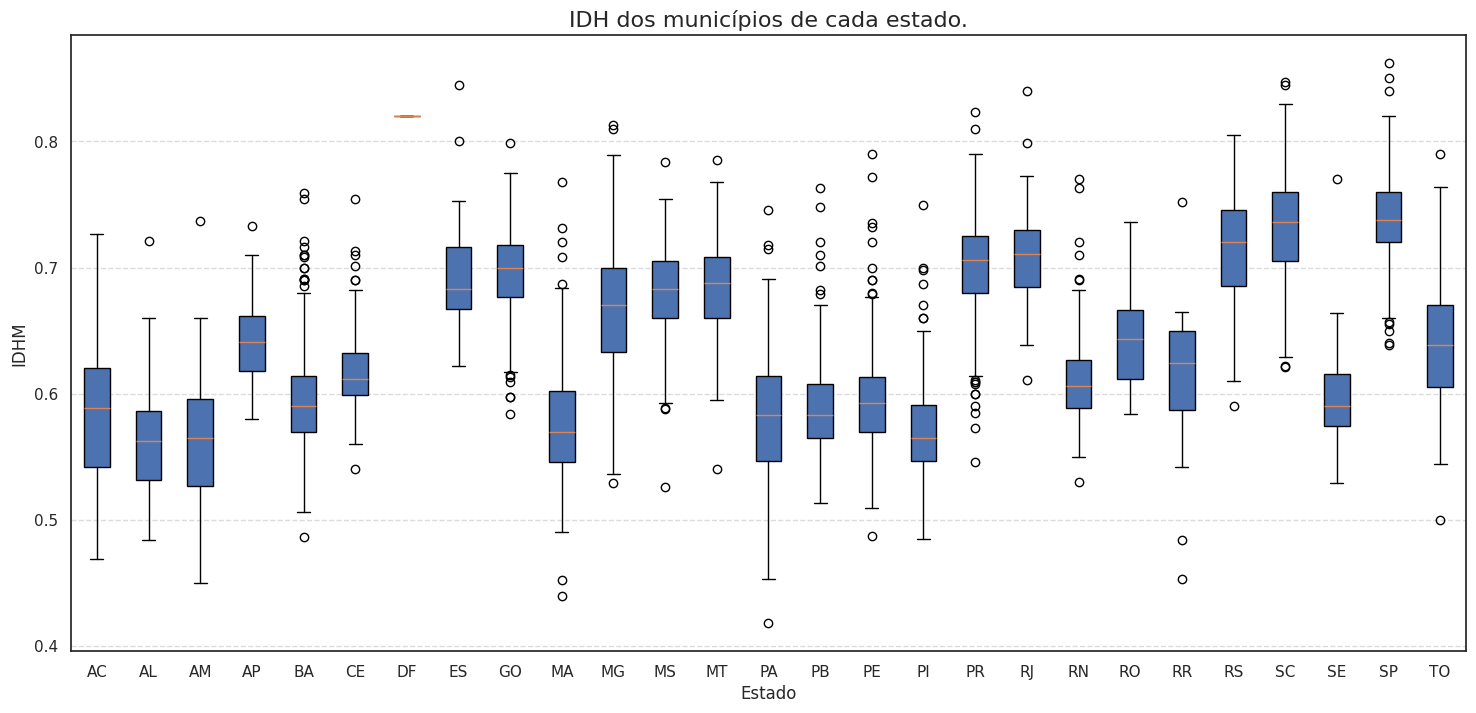

In [19]:
# @title Construa o seu código aqui

estados_ordenados = df_brasil['STATE'].sort_values().unique()
idhm_por_estado = [df_brasil[df_brasil['STATE'] == estado]['IDHM'] for estado in estados_ordenados]

plt.figure(figsize=(18, 8))
plt.boxplot(idhm_por_estado, tick_labels=estados_ordenados, patch_artist=True)
plt.title('IDH dos municípios de cada estado.', fontsize=16)
plt.ylabel('IDHM')
plt.xlabel('Estado')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráficos de Violino

* o gráfico de violino (violin plot), também sumariza a distribuição dos valores de um atributo em um conjunto de dados.
* ele utiliza a própria densidade amostral de cada região dos dados, facilitando a identificação de assimetrias e distribuições multimodais (Distribuições com vários picos de densidade)

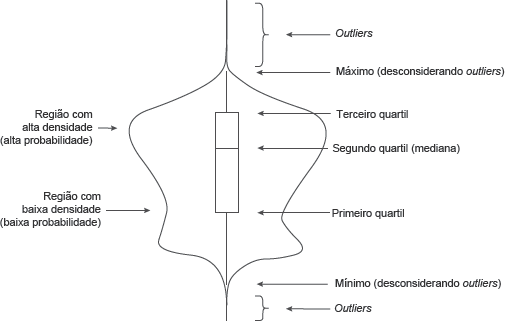

O gráfico deverá apresentar a seguinte visualização:

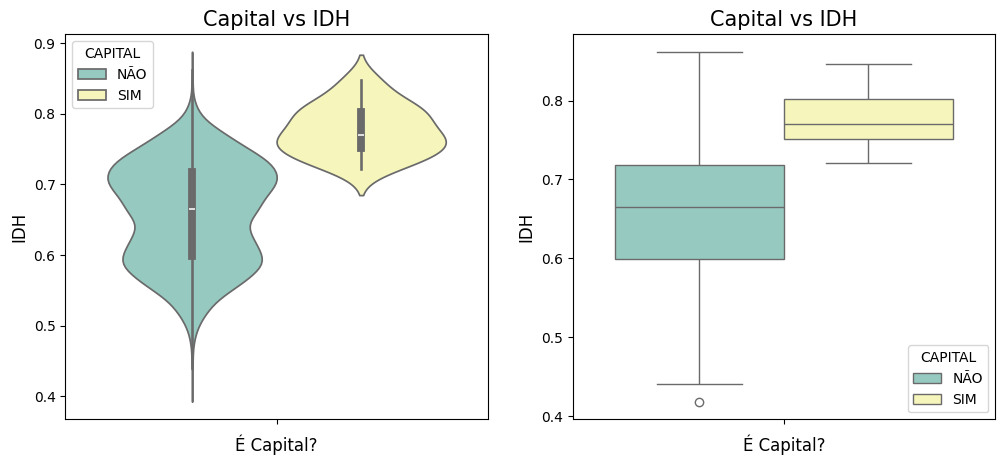

Olhando com atenção os dois gráficos, é possível observar que, embora os valores de IDH para os municípios que não são capitais possuam mediana em algum valor próximo a 0,7, existem dois picos amostrais (acima de 0,7 e abaixo de 0,6) que somente o gráfico de violino permite observar e que podem ser importantes para análises mais detalhadas da variável.

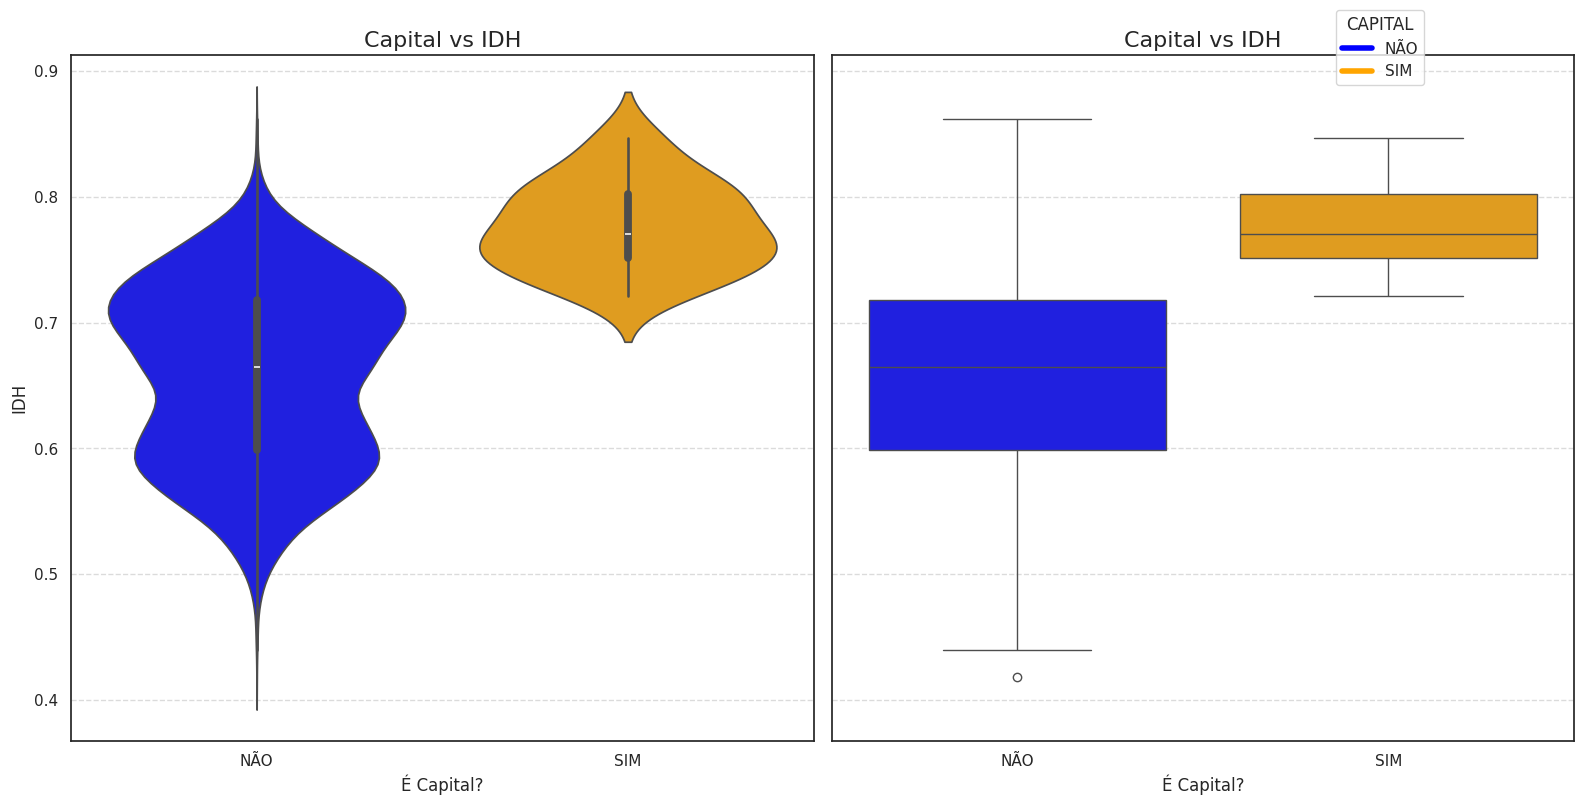

In [20]:
# @title Construa o seu código aqui

cores = {'NÃO': 'blue', 'SIM': 'orange'}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

sns.violinplot(
    data=df_brasil,
    x='CAPITAL',
    y='IDHM',
    hue='CAPITAL',
    palette=cores,
    dodge=False,
    ax=ax1,
    legend=False
)
ax1.set_title('Capital vs IDH', fontsize=16)
ax1.set_xlabel('É Capital?', fontsize=12)
ax1.set_ylabel('IDH', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

sns.boxplot(
    data=df_brasil,
    x='CAPITAL',
    y='IDHM',
    hue='CAPITAL',
    palette=cores,
    dodge=False,
    ax=ax2,
    showfliers=True,
    legend=False
)
ax2.set_title('Capital vs IDH', fontsize=16)
ax2.set_xlabel('É Capital?', fontsize=12)
ax2.set_ylabel('IDH', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

fig.legend(handles=[plt.Line2D([0], [0], color=cores[k], lw=4) for k in cores],
           labels=list(cores.keys()),
           title='CAPITAL',
           bbox_to_anchor=(0.9, 0.9),
           loc='lower right')

plt.tight_layout()
plt.show()

# Nuvens de Palavras

* representação visual da frequência com que palavras ocorrem em um texto
* cada palavra assume uma cor e o seu tamanho na nuvem é dado pela quantidade de vezes que a palavra aparece no texto

* Para ilustrar o seu uso, foi criada uma nuvem de palavras utilizando um texto formado pelo nome de todos os municípios do Brasil utilizando a biblioteca Wordcloud (https://amueller.github.io/word_cloud/index.html)
* Algumas palavras aparecem em destaque, maior tamanho, por serem usadas com frequência no nome dos municípios
* Uma breve análise desses nomes mostra, por exemplo, o impacto que a igreja católica tinha no país desde a colonização. Isso pode ser confirmado pelas múltiplas referências aos nomes de santos, a símbolos católicos e aos termos que os denominam, como “São”, “Santa”, “Santo”, “Cruz”, “João”, “José”, “Rita”
* Além disso, várias palavras fazem referências ao relevo e estruturas geográficas muito presentes no país, como “Campo”, “Lagoa”, “Minas”, “Sul”, “Norte” e “Monte”.

O gráfico deverá apresentar a seguinte visualização:

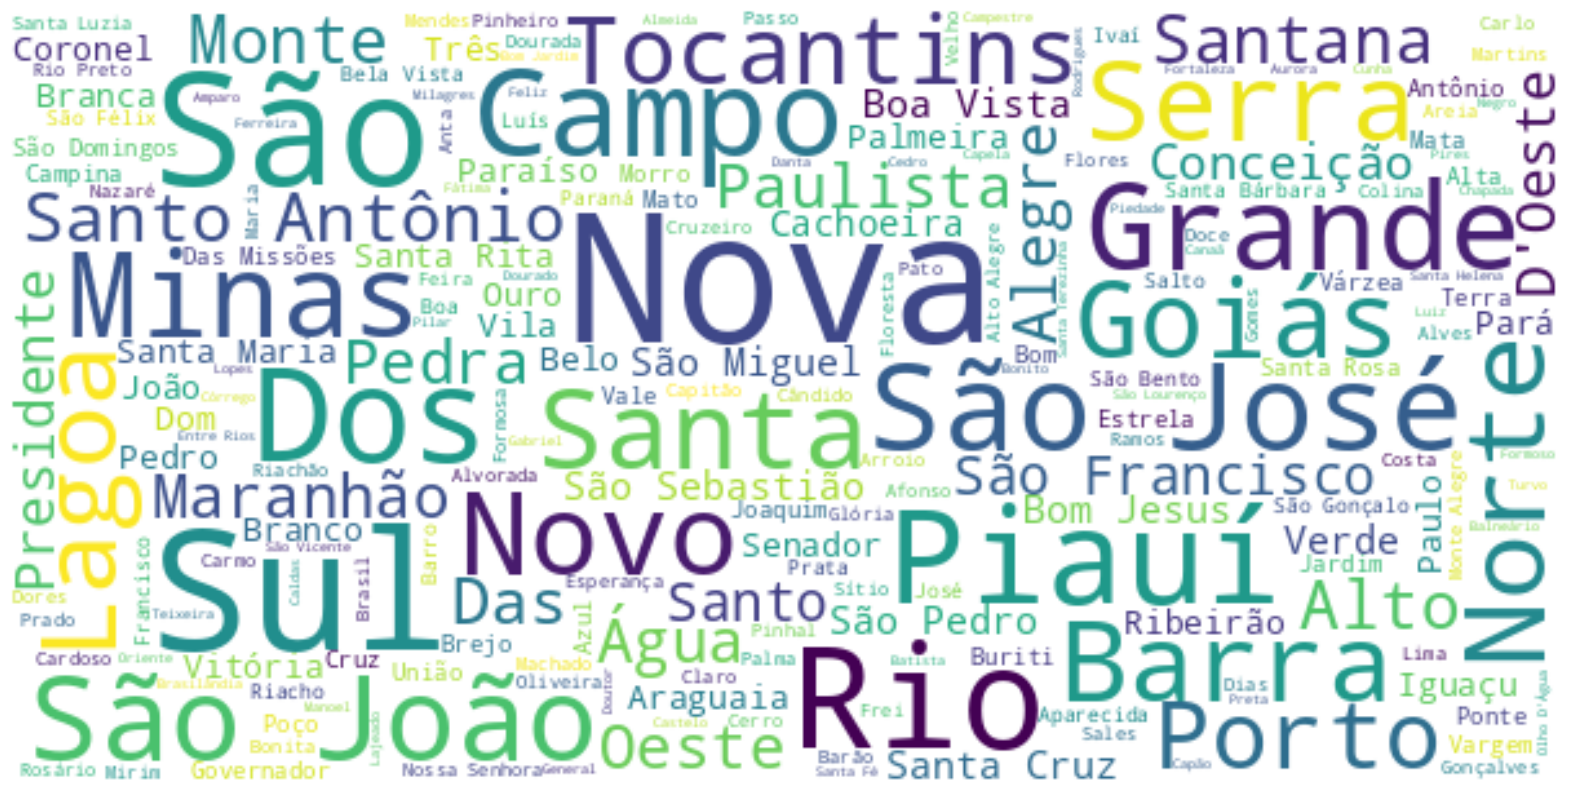

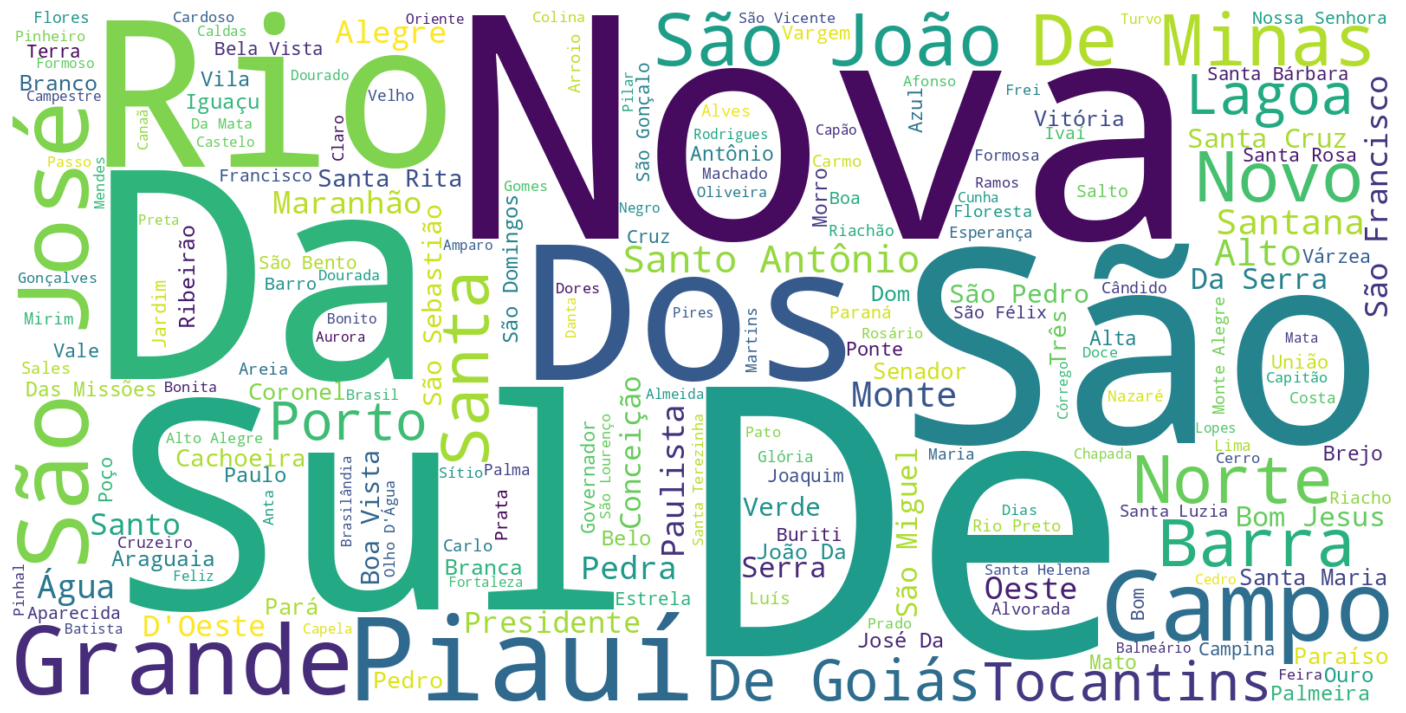

In [21]:
# @title Construa o seu código aqui

text = ' '.join(df_brasil['CITY'].dropna().tolist())

wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis',
    min_font_size=10,
    random_state=42
).generate(text)

plt.figure(figsize=(18, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Mapas de Calor

* utilizado para descrever a distribuição de vários atributos, permitindo uma análise multivariada, é o que produz mapas de calor (heatmap)
* uma matriz quadrada em que o mesmo conjunto ordenado de variáveis aparece nos eixos horizontal e vertical
* exemplo de utilização desse tipo gráfico é a representação de correlações entre variáveis
* Quanto maior a relação, mais forte, ou quente, a intensidade da cor

* A Figura ilustra o uso de um mapa de calor que mostra as correlações lineares entre as 14 variáveis quantitativas da base de dados dos municípios.
 * Existe uma forte correlação entre um município ter uma grande população e possuir uma abundância de empresas registradas e de impostos coletados.
 * Não é porque o município declara que tem mais gastos que outro que o valor de seu IDH será maior.
 * Uma vez que a latitude assume valores decrescentes à medida que nos afastamos da linha do Equador e os municípios com maior valor PIB no Brasil per capita se encontram na Região Sul/Sudeste, existe uma alta correlação negativa entre esses atributos. O mesmo se aplica à relação da posição geográfica com o valor do IDH.

O gráfico deverá apresentar a seguinte visualização:

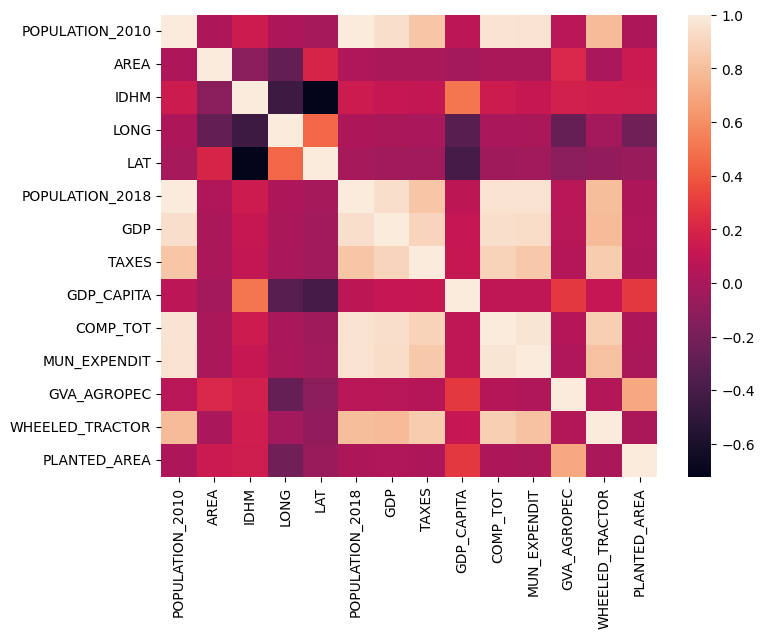

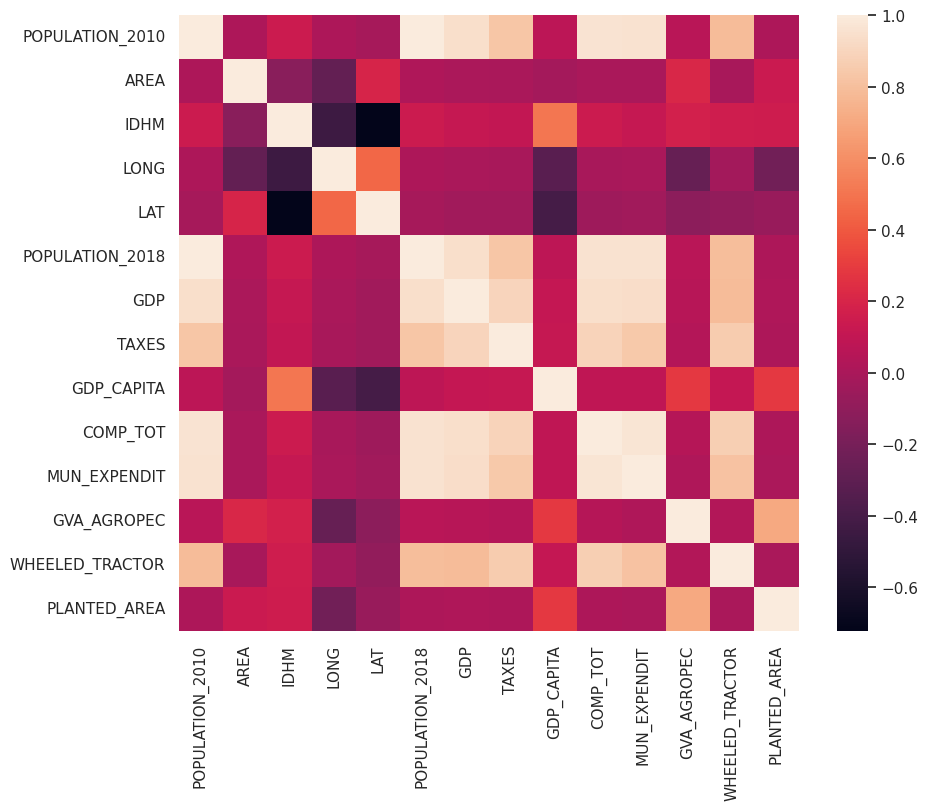

In [23]:
# @title Construa o seu código aqui

variaveis = [
    'POPULATION_2010', 'AREA', 'IDHM', 'LONG', 'LAT', 'POPULATION_2018',
    'GDP', 'TAXES', 'GDP_CAPITA', 'COMP_TOT', 'MUN_EXPENDIT',
    'GVA_AGROPEC', 'WHEELED_TRACTOR', 'PLANTED_AREA'
]
numerico = df_brasil[variaveis]
matriz = numerico.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz, cmap='rocket')
plt.show()